# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Загрузка файла с данными и изучение общей информации 

Импортируем библиотеку pandas, необходимую для обработки и анализа данных;  
модуль .pyplot из библиотеки matplotlib для создания графиков и гистограмм;  
библиотеку warnings, которая позволяет игнорировать предупреждения от указанного модуля;  
и счетчик Counter из collections.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

Прочитаем csv-файл методом .read_csv.  
Распечатаем первые 10 строк.

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# установка настроек для отображения всех колонок при печати
pd.set_option('display.max_columns', None)

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных из таблицы df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим подробнее полученную информацию.

Всего в таблице 22 столбца.
Типы данных столбцов: < bool >, < int64 >, < float64 > и < object >.
Количество значений в столбцах различается. Это говорит о том, что в данных есть пропуски.

Подробно разберем, какие в df столбцы, и какую информацию они содержат:

**Описание данных**  

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
* balcony — число балконов  
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**

Таблица df хранит информацию о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Каждая строка таблицы содержит информацию об одном объекте недвижимости: населенный пункт, стоимость, этажность дома, тип и планировка, различные измерения как самого объекта (площадь, высота потолков, количество комнат и др.), так и расстояния от него до центра города, до парков, водоёмов.

По таблице, содержащей описательную статистику, и по первым 10 строкам датасета, визуально, можно выделить следующие проблемы:  
* наличие пропущенных значений в столбцах (необходимо проанализировать их возникновение  
и при необходимости обработать: заполнить или удалить)
* разный регистр наименования столбца 'cityCenters_nearest' (необходимо изменить на нижний)
* слишком высокое значение (100м) высоты потолков в столбце 'ceiling_height',   
а также все ячейки со значением выше чем 3,7 м (заменить на медианы)
* слишком высокая этажность домов: по таблице максимум этажей = 60, но по последним данным в google,   
максимум этажей в жилом доме в Санкт-Петербурге может быть не более 37, а в Ленинградской области: не более 29

С учетом постановки задачи, также можно заключить, что целевым столбцом в дальнейшем для нас будет являться last_price, отражающий стоимость объекта недвижимости на момент снятия с публикации

### Предобработка данных

#### Корректировка наименований столбцов 

Для начала, изменим регистр наименования столбца с расстоянем до центра города, чтобы все наименования были удобочитаемы и к ним было легко обращаться:

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
df = df.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Приступим к обработке пропущенных значений.

Просмотрим список столбцов с суммами пропусков по ним:

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим все пропуски в столбце с балконами (**balcony**) на нули, сделав предположение что пропущены они потому что балкона в квартире нет  
Убудимся что замена прошла:

In [8]:
df.balcony = df.balcony.fillna(0)
df.balcony.isna().sum()

0

В столбце с апартаментами (**is_apartment**) обнаружено слишком много пропусков (20924 из 23699).  
Также, по условию задания мы берем в анализ только данные о жилых объектах, в то время как апартаменты относятся к нежилым помещениям. Следовательно, логично будет удалить все строки с положительным значением апартаментов (True), а все пропуски заменить на False.  
И убедимся что все действия выполнены правильно.

In [9]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [10]:
df.is_apartment = df.is_apartment.fillna(False)
df = df.query('is_apartment == False').reset_index(drop=True)
df.is_apartment.value_counts()

False    23649
Name: is_apartment, dtype: int64

Посмотрим на описание столбца с высотой потолков:

In [11]:
df.ceiling_height.describe()

count    14460.00000
mean         2.76072
std          0.93191
min          1.00000
25%          2.51000
50%          2.65000
75%          2.80000
max         32.00000
Name: ceiling_height, dtype: float64

В столбце **ceiling_height** (высота потолка) присутствуют слишком большие и слишком малые значения, но при этом медианное значение соответсвует ГОСТу, следовательно в данных присутствуют выбросы. 
Обработаем выбросы:  
* произведем замену всех значений, которые окажутся выше 3,7м (максимальная возможная высота потолка в жилом помещении, например в сталинке)  
* заменим значения, которые окажутся ниже чем 2,3 (самые низкие значения высоты потолка, учитывая здравый смысл) 

на медиану, предварительно выкинув их из выборки для более справедливого рассчета.

* Пропуски также заменим на медианное значение по столбцу.

In [12]:
ceiling_median =  df.query('2.3 <= ceiling_height <= 3.7').ceiling_height.median()
ceiling_median

2.65

In [13]:
df.studio.value_counts()

False    23500
True       149
Name: studio, dtype: int64

In [14]:
df.ceiling_height = df.ceiling_height.fillna(ceiling_median)
df.ceiling_height.isna().sum()

0

In [15]:
df.studio.value_counts()

False    23500
True       149
Name: studio, dtype: int64

In [16]:
df.ceiling_height = df.where(df.ceiling_height.between(2.3, 3.7), ceiling_median).ceiling_height
df.ceiling_height.describe()

count    23649.000000
mean         2.687661
std          0.186821
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.700000
Name: ceiling_height, dtype: float64

In [17]:
print('Максимальное значение высоты потолка:', df.ceiling_height.max())
print('Минимальное значение высоты потолка:', df.ceiling_height.min())

Максимальное значение высоты потолка: 3.7
Минимальное значение высоты потолка: 2.3


Посмотрим на информацию о датасете еще раз:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23649 entries, 0 to 23648
Data columns (total 22 columns):
total_images            23649 non-null int64
last_price              23649 non-null float64
total_area              23649 non-null float64
first_day_exposition    23649 non-null object
rooms                   23649 non-null int64
ceiling_height          23649 non-null float64
floors_total            23563 non-null float64
living_area             21754 non-null float64
floor                   23649 non-null int64
is_apartment            23649 non-null bool
studio                  23649 non-null bool
open_plan               23649 non-null bool
kitchen_area            21386 non-null float64
balcony                 23649 non-null float64
locality_name           23600 non-null object
airports_nearest        18116 non-null float64
citycenters_nearest     18137 non-null float64
parks_around3000        18138 non-null float64
parks_nearest           8060 non-null float64
ponds_around3000

In [19]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1895
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2263
balcony                     0
locality_name              49
airports_nearest         5533
citycenters_nearest      5512
parks_around3000         5511
parks_nearest           15589
ponds_around3000         5511
ponds_nearest           14569
days_exposition          3169
dtype: int64

Рассмотрим столбцы **parks_nearest** (расстояние до ближайшего парка) и **parks_around3000** (кол-во парков в радиусе 3км):  
в них методом .info() мы определили большое количество пропусков: 

In [20]:
print(df.parks_around3000.isna().sum(), 'пропусков в "parks_around3000" из', len(df.index), 'количества значений.')
print(df.parks_nearest.isna().sum(), 'пропусков в "parks_nearest" из', len(df.index), 'количества значений.')

5511 пропусков в "parks_around3000" из 23649 количества значений.
15589 пропусков в "parks_nearest" из 23649 количества значений.


Посмотрим какое количество парков указано у строк с пропущенным расстоянием до них:

In [21]:
df.query('parks_nearest.isna()').parks_around3000.value_counts()

0.0    10078
Name: parks_around3000, dtype: int64

Мы видим, что расстояние до парка пропущено у тех объектов, которые не имеют поблизости ни одного парка.  
Это логичнее, чем заполнять пропуски нулями, т.к. по таким данным можно будет сделать неверный вывод о том, что объект недвижимости находится прямо внутри парка.  
Поэтому, чтобы сохранить логику, оставим пропуски незаполненными.  

По тому же принципу проверяем столбцы с информацией о ближайших водоёмах (**ponds_around3000**) и расстоянием до них (**ponds_nearest**):

In [22]:
print(df.ponds_around3000.isna().sum(), 'пропусков в "ponds_around3000" из', len(df.index), 'количества значений.')
print(df.ponds_nearest.isna().sum(), 'пропусков в "ponds_nearest" из', len(df.index), 'количества значений.')

5511 пропусков в "ponds_around3000" из 23649 количества значений.
14569 пропусков в "ponds_nearest" из 23649 количества значений.


In [23]:
df.query('ponds_nearest.isna()').ponds_around3000.value_counts()

0.0    9058
Name: ponds_around3000, dtype: int64

Таким образом, можно сделать аналогичный вывод что и с парками и оставить пропуски в данных двух столбцах незаполненными.

Посмотрим на связку пропущенных значений в столбце **citycenters_nearest** (расстояние до центра города) со значениями столбца **locality_name** (населенный пункт) по этим строкам:

In [24]:
df.query('citycenters_nearest.isna()').locality_name.value_counts()

посёлок Мурино                                522
Всеволожск                                    397
Гатчина                                       307
деревня Кудрово                               299
Выборг                                        234
                                             ... 
деревня Каськово                                1
деревня Котлы                                   1
посёлок при железнодорожной станции Вещево      1
деревня Кривко                                  1
посёлок Алексеевка                              1
Name: locality_name, Length: 344, dtype: int64

У каждого населенного пункта свой центр со своими уникальными координатами, которые нам не даны в таблице. Можно было бы используя гугл карты заполнить данные пропуски путем рассчета расстояний до центра каждого из 344 населенных пунктов, но т.к. данный столбец **citycenters_nearest** не фигурирует в заданиях по предобработке и анализу, сделаем вывод о его незначительной важности в решении нашей задачи и оставим пропуски в нем незаполненными.  
Аналогичный вывод можно сделать на счет пропусков в столбце с расстоянием до ближайшего аэропорта **airports_nearest**:

In [25]:
df.query('airports_nearest.isna()').locality_name.value_counts()

посёлок Мурино                       522
Всеволожск                           397
Гатчина                              307
деревня Кудрово                      299
Выборг                               234
                                    ... 
посёлок Коробицыно                     1
садовое товарищество Приладожский      1
поселок Жилгородок                     1
деревня Сижно                          1
поселок Тёсово-4                       1
Name: locality_name, Length: 343, dtype: int64

Не имеет смысла заполнять 343 значения в данных, которые нам не пригодятся для дальнейшего анализа и никак на него не повлияют, т.к. не будут нигде использованы.  

Далее посмотрим на пропуски столбце **floors_total** (всего этажей в доме):

In [26]:
print(df.floors_total.isna().sum(), 'пропусков в столбце "floors_total" из', len(df.index), 'количества значений.')
print(df.floor.isna().sum(), 'пропусков в столбце "floor"')

86 пропусков в столбце "floors_total" из 23649 количества значений.
0 пропусков в столбце "floor"


Посмотрим на описание значений в столбце с этажностью домов:

In [27]:
df.floors_total.describe()

count    23563.000000
mean        10.681832
std          6.597585
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В глаза бросается максимум в 60 этажей. По данным самых высоких жилых зданий, в Санкт-Петербурге и Ленинградской области, максимальная этажность зданий не превышает 37. По описанию данных в столюце, мы видим что медианная этажность действительно не высокая - медиана равна 9 этажам, что очень похоже на правду.  
Проверим сколько значений слишком высоки для реальности:

In [28]:
df.query('floors_total > 37').floors_total.count()

2

In [29]:
df.query('floors_total > 37').floor

2249      4
16696    18
Name: floor, dtype: int64

Таких домов всего 2, объекты недвижимости в них находятся на 4 и на 18 этаже.  
Заменим слишком высокие значения этажности на максимальное между медианой и этажом, на котором находится данный объект:

In [30]:
import numpy as np

median = df.floors_total.median()
df.floors_total = df.floors_total.where(df.floors_total <= 37, np.maximum(df.floor, median))
    
print (df['floors_total'][2249])
print (df['floors_total'][16696])

9.0
18.0


По печати, можно убедиться что этажность домов заменена корректно.  
Заменим пропуски в столбце с этажностью по тому же принципу, по которому заменяли слишком большие показатели  
(аполним на основе данных об этаже объекта недвижимости, которые, в свою очередь, полностью заполнены):

In [31]:
df.floors_total = df.floors_total.fillna(np.maximum(df['floor'], median))
df.floors_total.isna().sum()

0

Пропусков в floors_total больше нет. 

Убедимся в корректности данных в столбцах **floors_total и floor**  
(этажность дома не должна быть ниже чем этаж объекта недвижимости): 

In [32]:
df.query('floors_total < floor').floors_total.count()

0

In [33]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1895
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2263
balcony                     0
locality_name              49
airports_nearest         5533
citycenters_nearest      5512
parks_around3000         5511
parks_nearest           15589
ponds_around3000         5511
ponds_nearest           14569
days_exposition          3169
dtype: int64

Пропуски в столбце **days_exposition** — сколько дней было размещено объявление (от
публикации **до снятия**) можно объяснить тем, что квартира на настоящий момент еще не продана.  
Получается что пропуски имеют логику и убирать/заменять их нет необходимости.

Также 49 пропусков найдены в столбце с наименованием населенного пункта(**locality_name**). Можно предположить, что они образовались в результате некорректного ручного ввода данных. Для них нет способа подобрать логичные или подходящие значения на замену, т.к. у нас нет подсказок(например таких как координаты), поэтому придется оставить такие ячейки пустыми. 

Посмотрим на пропуски в столбцах **kitchen_area** (площадь кухни), **living_area** (жилая площадь), **total_area** (общая площадь квартиры):

In [34]:
print(df.kitchen_area.isna().sum(), 'пропусков в столбце "kitchen_area" из', len(df.index), 'количества значений.')
print(df.living_area.isna().sum(), 'пропусков в столбце "living_area" из', len(df.index), 'количества значений.')
print(df.total_area.isna().sum(), 'пропусков в столбце "total_area"')
print()
print(len(df[df.kitchen_area.isna() & df.living_area.isna()]), 
      'пропусков одновременно в 2х столбцах "kitchen_area" и "living_area"')

2263 пропусков в столбце "kitchen_area" из 23649 количества значений.
1895 пропусков в столбце "living_area" из 23649 количества значений.
0 пропусков в столбце "total_area"

1458 пропусков одновременно в 2х столбцах "kitchen_area" и "living_area"


Такие пропуски могли образоваться в результате некорректного ручного заполнения данных.

Произведем замену пропусков в данных столбцах числом получившимся при умножения общей площади на средний коэффициент по известным данным: отношение жилой площади или площади кухни к общей площади:

In [35]:
df.query('kitchen_area==0').kitchen_area.count()

0

In [36]:
kitchen_coef = df.kitchen_area.mean() / df.total_area.mean()
living_coef = df.living_area.mean() / df.total_area.mean()

df.kitchen_area = df.kitchen_area.fillna(df.total_area * kitchen_coef)
df.living_area = df.living_area.fillna(df.total_area * living_coef)

print('В колонке "kitchen_area"', df.kitchen_area.isna().sum(), 'пропущенных значений.')
print('В колонке "living_area"', df.living_area.isna().sum(), 'пропущенных значений.')

В колонке "kitchen_area" 0 пропущенных значений.
В колонке "living_area" 0 пропущенных значений.


Проверим все ли значения площадей логичны, т.е. суммарная жилая площадь и кухни должна быть меньше чем общая.  
Выведем количество строк, у которых это условие не выполняется и общая площадь получилась меньше чем сумма кухни и жилой:

In [37]:
print(len(df.query('(kitchen_area + living_area) >= total_area')), 'из общего количества строк:', len(df.index))

186 из общего количества строк: 23649


Мы нашли незначительное количество квартир, у которых размеры площади не удовлетворяют реальному положению дел.  
Перезапишем датафрейм, исключив эти строки, оставив только корректные данные,  
Проверим что все исправно выполнено:

In [38]:
df = df.query('(living_area + kitchen_area) < total_area')
print(len(df.query('(kitchen_area + living_area) >= total_area')), 'из общего количества строк:', len(df.index))

0 из общего количества строк: 23463


Посмотрим на столбец с данными о количестве комнат **rooms**:

In [39]:
df.rooms.describe()

count    23463.000000
mean         2.073477
std          1.076902
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [40]:
df.query('rooms == 0').rooms.count()

179

Видим, что минимальное количество комнат равно нулю, что не может быть действительностью.  
Можно сделать предположение о том, что нули оказались на месте необходимых единиц у квартир-студий (т.к. предположительно, этот столбец заполнял человек, а не машина, он мог исходя из того, что студия - это не однушка, заполнить кол-во комнат как ноль):

In [41]:
df.query('rooms == 0').studio.value_counts()

True     125
False     54
Name: studio, dtype: int64

In [42]:
df.query('studio == True').rooms.value_counts()

0    125
1      9
Name: rooms, dtype: int64

In [43]:
len(df.query('studio == True').rooms)

134

In [44]:
df.query('rooms == 0').rooms.count()

179

Мы видим что всего в квартирах-студиях заполнено 125 нулевых значений у столбца с количеством комнат. Всего студий найдено 134. 9 из них указаны как однокомнатные, что соответствует действительности.

Произведем замену всех нулевых значений комнат у студий на единицу:

In [45]:
df.rooms = df.where((df.rooms != 0) & (df.studio == False), 1).rooms
df.query('studio == True').rooms.value_counts()

1    134
Name: rooms, dtype: int64

#### Типы данных

Посмотрим на типы данных в колонках датафрейма:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23463 entries, 0 to 23648
Data columns (total 22 columns):
total_images            23463 non-null int64
last_price              23463 non-null float64
total_area              23463 non-null float64
first_day_exposition    23463 non-null object
rooms                   23463 non-null int64
ceiling_height          23463 non-null float64
floors_total            23463 non-null float64
living_area             23463 non-null float64
floor                   23463 non-null int64
is_apartment            23463 non-null bool
studio                  23463 non-null bool
open_plan               23463 non-null bool
kitchen_area            23463 non-null float64
balcony                 23463 non-null float64
locality_name           23414 non-null object
airports_nearest        17993 non-null float64
citycenters_nearest     18014 non-null float64
parks_around3000        18015 non-null float64
parks_nearest           8004 non-null float64
ponds_around3000

С учетом колчественного содержимого, которое не может быть дробным,  
тип данных следующих колонок стоит заменить с вещественного float на целочисленный integer: 
* **floors_total** - всего этажей в доме
* **balcony** - количество балконов  

Также есть количественные столбцы с пропусками, в которых было бы логично сделать замену типа на целочисленный, но это невозможно, т.к. пропуски мы оставили намеренно:
* parks_around3000 - число парков в радиусе 3 км (есть пропуски)
* ponds_around3000 - число водоёмов в радиусе 3 км (есть пропуски)

In [47]:
df.floors_total = df.floors_total.astype('int64')
df.balcony = df.balcony.astype('int64')

Столбец **first_day_exposition**, содержащий даты публикации объявлений о продаже квартир, также следует перевести из строкового типа данных в дату и время. Произведем замену при помощи метода .to_datetime и убедимся в том, что все выполнено корректно:

In [48]:
df.first_day_exposition = pd.to_datetime(df.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.79007,9,False,False,False,27.839715,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод:**

1. В данном пункте мы произвели замену регистра наименования столбца с расстоянием до центра города для удобного обращения к нему в дальнейшем.
2. Обработали пропуски в столбцах с количеством балконов, высотой потолков, этажностью дома, площадями кухни и жилой, апартаментами.  
3. Удалили строки:  
    * с положительным значением об апартаментах за ненужностью в дальнейшем анализе, связанном с жилыми объектами недвижимости (т.к. апартаменты - это нежилая недвижимость).
    * с суммарной площадью кухни и жилой, которая оказалась больше чем общая 
4. Объяснили почему не стоит трогать пропуски в остальных столбцах:   
    * либо нет данных чтобы заполнить корректно: столбцы с названием населенного пункта, расстояние до аэропорта; 
    * либо не нужны в дальнейшей работе: расстояния и количество парков, водоемов;
    * либо пропуски являются логичными: также в расстояния и количество парков, водоемов, и еще в столбце с кол-вом дней, которое было размещено объявление до его снятия (снятие до сих пор не произошло)
6. Заменили значения слишком высоких и низких потолков на медианное, заменили нулевые значения в столбце с кол-вом комнат на единицу, проследив связь с положительной отметкой о том, что квартира является студией ( а у студий 1 комната, а не 0)
5. Заменили некорректные типы данных в столбцах, где это возможно: этажность и балконы с вещественного на целочисленный (т.к. это количественные показатели), и дату размещения объявления - со строкового на дату/время.

### Рассчет и добавление в таблицу дополнительных параметров

Посчитаем и добавим в таблицу столбец, содержащий цену квадратного метра по каждому объекту недвижимости:

In [49]:
df['price_m2'] = df.last_price / df.total_area
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.79007,9,False,False,False,27.839715,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавим в таблицу также день недели, месяц и год публикации объявления по столбцу first_day_exposition:

In [50]:
df['year_exposition'] = pd.DatetimeIndex(df.first_day_exposition).year
df['month_exposition'] = pd.DatetimeIndex(df.first_day_exposition).month
df['day_exposition'] = pd.DatetimeIndex(df.first_day_exposition).dayofweek

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.79007,9,False,False,False,27.839715,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1


Добавим столбец, содержащий этаж квартиры (варианты — первый, последний, другой) при помощи создания функции, которая пройдет по всем строкам, проверяя выполнение условий, и с помощью метода .apply заполним новый столбец данными, которые она вернет:

In [51]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

df['floor_class'] = df.apply(floor_cat, axis=1)
df['floor_class'].value_counts()

другой       17254
последний     3328
первый        2881
Name: floor_class, dtype: int64

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.79007,9,False,False,False,27.839715,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой


Добавим столбцы с отношением:
1. жилой площади к общей площади
2. площади кухни к общей

In [53]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area'] 

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.79007,9,False,False,False,27.839715,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,другой,0.571007,0.175093
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


**Вывод**

В данном пункте при помощи рассчетов и присваивания, мы создали новые столбцы с необходимыми нам данными, включающими: 
* цену квадратного метра 
* категории по расположению этажа, на котором находится квартира (первый, последний, другой)
* день недели, месяц и год публикации объявления о продаже квартиры
* отношения площадей (жилая к общей и кухня к общей)

### Исследовательский анализ данных

####   Проведем исследование следующих параметров: площадь, цена, число комнат, высота потолков

In [54]:
df.last_price.describe()

count    2.346300e+04
mean     6.526357e+06
std      1.085443e+07
min      1.219000e+04
25%      3.425000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [55]:
df.total_area.describe()

count    23463.000000
mean        60.366971
std         35.542742
min         13.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [56]:
df['total_area'].corr(df['last_price'])

0.6524417791213498

Согласно полученному положительному результату коэффициента корреляции Пирсона, можно сделать предположение, что между площадью квартиры и ее стоимостью существует прямая зависимость и между величинами существует линейная взаимосвязь.

In [57]:
df.rooms.describe()

count    23463.000000
mean         2.081106
std          1.065669
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [58]:
df['rooms'].corr(df['last_price'])

0.363593151440854

Мы получили положительное значение коэффициента корреляции, но т.к. показатель ближе к нулю, чем к единице, можно сделать предположение о том, что между количеством комнат и стоимостью квартиры имеется слабая линейная взаимосвязь.

In [59]:
df.ceiling_height.describe()

count    23463.000000
mean         2.687716
std          0.187048
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.700000
Name: ceiling_height, dtype: float64

In [60]:
df['ceiling_height'].corr(df['last_price'])

0.2477367731043528

Коэффициент корреляции между высотой потолков и стоимостью квартиры сильно близок к нулю, из чего можно сделать предположение о том, что  зависимость данных величин отсутствует либо настолько слаба, что не имеет ценности для ее дальнейшего использования.

Все наши предположения, по поводу взаимосвязи между величинами, необходимо будет проверить с помощью матрицы диаграмм рассеяния.

**Построим гистограммы для каждого параметра:**

Выведем гистограмму распределения **стоимости квартир (last_price)**:

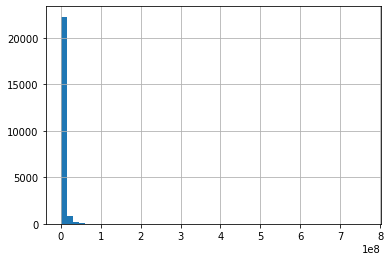

In [61]:
df['last_price'].hist(bins=50)
plt.show()

Значительную часть гистограммы занимают значения, напоминающие выбросы.

In [62]:
df.last_price.describe()

count    2.346300e+04
mean     6.526357e+06
std      1.085443e+07
min      1.219000e+04
25%      3.425000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Мы можем наблюдать что максимальная стоимость на несколько нулей отличается от медианы и 3го квартиля. Посмотрим сколько значений окажутся, к примеру, выше 100 млн, можем ли мы их отбросить для более красивого вывода гистограммы. 

In [63]:
df.query('last_price > 10000000').last_price.count()

2683

Выведем гистограмму, ограничив значения стоимости на стоимости = 100 млн:

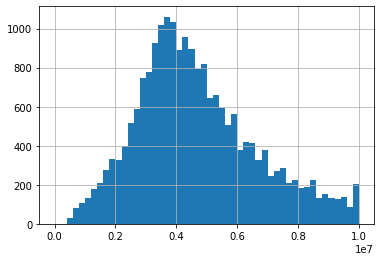

In [64]:
df['last_price'].hist(bins=50, range=(0, 10000000))
plt.show()

Теперь можно увидеть, что гистограмма напоминает нам распределение Гаусса (нормальное), что больше похоже на правду, чем то что она напоминала сначала (распределение Пуассона).  
По гистограмме можно проследить, что чаще всего встречается среднее значение и близкие к нему, а крайние значения встречаются довольно редко  
В данных есть выбросы. Кажется, что слишком дорогие квартиры не нужно учитывать, так как такая недвижимость относится к элитному классу и заслуживает отдельного исследования.

Выведем гистограмму распределения **площади (total_area)**:

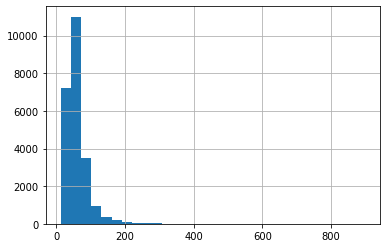

In [65]:
df['total_area'].hist(bins=30)
plt.show()

С показательями площади повторилась та же история, что со значениями стоимости: гистограмма напоминает нам Пуассновское распределение, т.к. вероятнее всего присутствуют выбросы. По описанию столбца, максимальное значение сильно отлично от 3го квартиля (например те что выше 150м2). Отрежем все значения, что находятся выше него и переделаем гистограмму по оставшимся значениям:

In [66]:
df.query('total_area > 150').total_area.count()

557

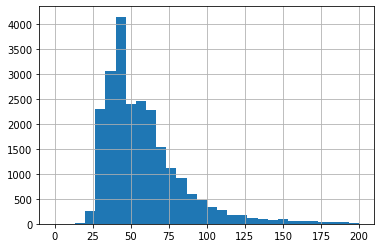

In [67]:
df['total_area'].hist(bins=30, range=(0, 200))
plt.show()

Выведем гистограмму распределения **числа комнат (rooms)**:

In [68]:
df['rooms'].max()

19

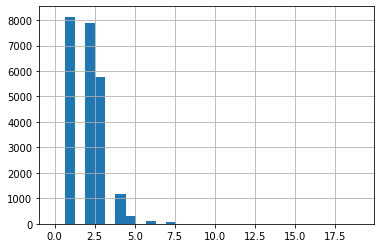

In [69]:
df['rooms'].hist(bins=30, range=(0, 19))
plt.show()

In [70]:
df.query('rooms > 4').rooms.count()

514

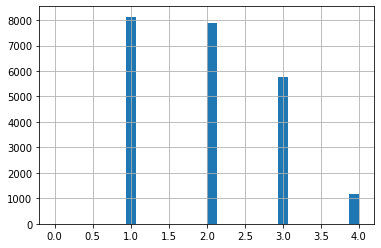

In [71]:
df['rooms'].hist(bins=30, range=(0, 4))
plt.show()

Гистограмма напоминает столбчатую, т.к. значений всего 4 (1,2,3,4 комнаты в квартирах) и они целого типа.  
Можно наблюдать что больше всего продавалось однокомнатных и двухкомнатных квартир, т.е. стандартных.

Выведем гистограмму распределения **высоты потолков (ceiling_height)**:

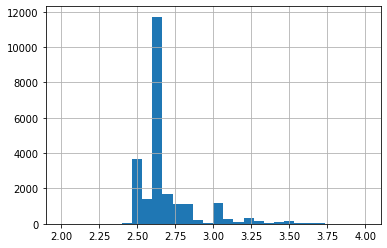

In [72]:
df['ceiling_height'].hist(bins=30, range=(2, 4))
plt.show()

По гистограмме можно сделать вывод о том что в датасете больше всего квартир с потолком высотой между 2,4м и 2,6м,  
но также встречаются квартиры с очень высокими потолками: больше 3х метров, но таких квартир очень и очень мало

####  Исследование количества времени для продажи квартиры 

In [73]:
print('Среднее:', df.days_exposition.mean())
print('Медиана:', df.days_exposition.median())

Среднее: 181.09023333661514
Медиана: 96.0


In [74]:
df.days_exposition.describe(include = 'all')

count    20314.000000
mean       181.090233
std        219.544409
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [75]:
1580/365

4.328767123287672

По описанию видим, что квартиры продавались от 1 дня до 4 лет и, в среднем, это происходило за 181 день (учитывая среднее mean).  
Стандартное отклонение очень высокое (std ~ 219), а значит в данных столбца присутствует большой разброс между значениями.

Построим гистограмму:

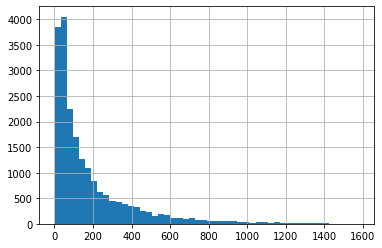

In [76]:
df.days_exposition.hist(bins=50)

Присутствует большой пик возле нуля. Это характерно либо для распределения Пуассона, либо присутствуют какие-то выбросы.  
Попробуем использовать диаграмму разброса:

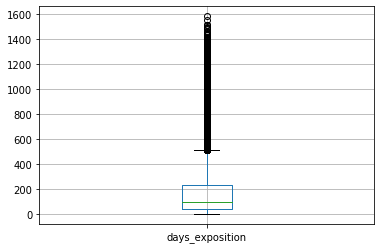

In [77]:
df.boxplot(column='days_exposition')

По графику отметим, что основные значения находятся в пределах ящика, а это примерно между 20 и 220  
В размах усов попадают нормальные значения, которые ограничены значением примерно 500.  
Далее идут выбросы (значения выше 500)  

Построим гистограмму, исключив эти значения, и посмотрим что получится:

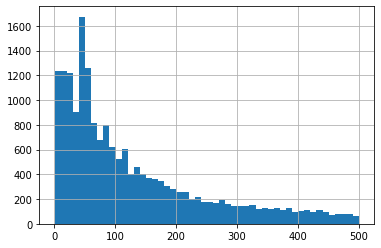

In [78]:
df.days_exposition.hist(bins=50, range=(1, 500))

In [79]:
print('Среднее:', df.query('days_exposition <= 500').days_exposition.mean())
print('Медиана:', df.query('days_exposition <= 500').days_exposition.median())

Среднее: 127.43389119087338
Медиана: 85.0


В среднем продажа квартиры занимает 2-3 месяца, а вот если сделка соверишась сильно раньше, то продажу можно считать быстрой.

In [80]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.79007,9,False,False,False,27.839715,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,другой,0.571007,0.175093
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


*Посмотрим на столбец days_exposition в связке с другими столбцами*

**С столбцами studio и open_plan:**  
т.к. свободная планировка это то же самое что квартира-студия, мы сформируем новый столбец в датафрейме, в котором объединим положительные отметки из столбцов studio и open_plan в одну категорию: 'Свободная планировка', остальные квартиры отнесем к категории 'Закрытая планировка':

In [81]:
def plan_flat(row):
    if row['studio'] == True:
        return 'Свободная планировка'
    if row['open_plan'] == True:
        return 'Свободная планировка'
    return 'Закрытая планировка'

df['plan_flat'] = df.apply(plan_flat, axis=1)
df['plan_flat'].value_counts()

Закрытая планировка     23267
Свободная планировка      196
Name: plan_flat, dtype: int64

Теперь сравним среднее вермя продажи квартиры по этим двум категориям:

In [82]:
stat_grouped_studio = df.pivot_table(index='plan_flat', values='days_exposition')
stat_grouped_studio.columns = ['mean_days_exposition']
stat_grouped_studio

,mean_days_exposition
plan_flat,
Закрытая планировка,181.692579
Свободная планировка,114.461538


По сводной таблице видим, что квартиры-студии продавались быстрее, чем остальные.

**Посмотрим на время продажи в связке с количеством комнат в квартире:**

In [83]:
stat_grouped_rooms = df.pivot_table(index='rooms', values='days_exposition')
stat_grouped_rooms.columns = ['mean_days_exposition']
stat_grouped_rooms

,mean_days_exposition
rooms,
1,158.042840
2,172.946348
3,204.800711
4,254.222814
5,303.750000
6,278.440000
7,202.055556
8,416.700000
9,463.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35607a350>]],
      dtype=object)

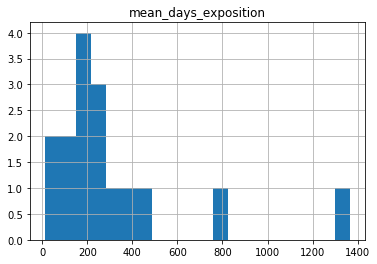

In [84]:
stat_grouped_rooms.hist(bins=20)

По таким данным, можно сделать вывод о том, что взаимосвязи между количеством комнат и продолжительностью продажи квартиры либо совсем нет, либо настолько незначительная, что ее не нужно брать в учет. 

**Посмотрим на время продажи в связке с площадью квартиры:**

для начала разделим жилье на категории по общей площади квартир (добавим новый столбец с категорией квартиры)

In [85]:
def total_area_grupps(row):
    if row['total_area'] <= 36:
        return 'econom'
    if row['total_area'] > 50 and row['total_area'] < 100:
        return 'business-class'
    if row['total_area'] >= 100:
        return 'premium'   
    return 'comfort'

df['flat_class'] = df.apply(total_area_grupps, axis=1)
df['flat_class'].value_counts()

business-class    10489
comfort            7045
econom             4041
premium            1888
Name: flat_class, dtype: int64

In [86]:
stat_grouped_area = df.pivot_table(index='flat_class', values='days_exposition')
stat_grouped_area.columns = ['mean_days_exposition']
stat_grouped_area

,mean_days_exposition
flat_class,
business-class,190.387629
comfort,160.798733
econom,150.495628
premium,291.010482


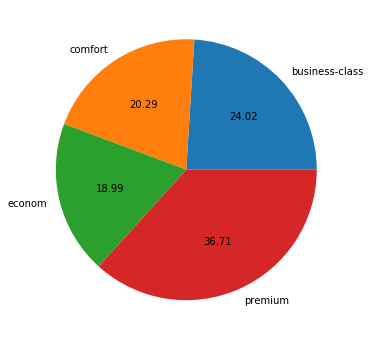

In [87]:
stat_grouped_area.plot(y='mean_days_exposition', kind='pie', autopct='%.2f', legend=False, figsize=(6, 6))
plt.axis('off')
plt.show()
plt.close()

По сводной таблице и круговой диаграмме можно сделать вывод о том, что:  
* быстрее всего продается жилье эконом и кофорт вариантов (до 50 кв м),  
* дольше них продается квартиры, относящиеся к бизнес-классу(от 50 до 100 кв м),  
* ну а жилье премиум класса (с площадью более 100 кв м) продается дольше всех категорий, хоть его не так уж и много

**Посмотрим на время продажи в связке с этажом квартиры:**

In [88]:
stat_grouped_area = df.pivot_table(index='floor_class', values='days_exposition')
stat_grouped_area.columns = ['mean_days_exposition']
stat_grouped_area

,mean_days_exposition
floor_class,
другой,175.597159
первый,202.741393
последний,191.731768


На первом и последнем этажах квартиры продаются явно дольше чем на всех других.

**Посмотрим на время продажи объявлений в зависимости от года публикации:**

In [89]:
stat_grouped_area = df.pivot_table(index='year_exposition', values='days_exposition')
stat_grouped_area.columns = ['mean_days_exposition']
stat_grouped_area

,mean_days_exposition
year_exposition,
2014,913.544643
2015,647.566816
2016,321.386102
2017,159.076757
2018,94.611461
2019,30.908497


По сводной таблице можно проследить как с годами линейно уменьшается среднее время продажи квартир. 

####   Уберём редкие и выбивающиеся значения

In [90]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,living_to_total,kitchen_to_total
count,23463.000000,2.346300e+04,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000,17993.000000,18014.000000,18015.000000,8004.000000,18015.000000,9024.000000,20314.000000,2.346300e+04,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,9.857691,6.526357e+06,60.366971,2.081106,2.687716,10.672335,34.508173,5.889784,10.470557,0.587990,28792.499472,14199.944377,0.609992,491.642054,0.768859,517.717753,181.090233,9.922155e+04,2017.366449,6.398287,2.569492,0.563357,0.185507
std,5.676425,1.085443e+07,35.542742,1.065669,0.187048,6.567483,22.220609,4.880111,5.968180,0.956386,12630.316218,8606.307274,0.800237,341.789078,0.936757,277.752223,219.544409,4.978304e+04,1.038868,3.492011,1.788235,0.098578,0.068326
min,0.000000,1.219000e+04,13.000000,1.000000,2.300000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,2014.000000,1.000000,0.000000,0.021583,0.025381
25%,6.000000,3.425000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18576.000000,9238.750000,0.000000,288.000000,0.000000,293.000000,45.000000,7.656250e+04,2017.000000,3.000000,1.000000,0.500000,0.136508
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13101.000000,0.000000,455.000000,1.000000,502.000000,96.000000,9.490741e+04,2017.000000,6.000000,3.000000,0.571007,0.175093
75%,14.000000,6.790000e+06,69.900000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,37268.000000,16295.500000,1.000000,612.250000,1.000000,728.000000,232.000000,1.140625e+05,2018.000000,10.000000,4.000000,0.629630,0.222611
max,50.000000,7.630000e+08,900.000000,19.000000,3.700000,37.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000,12.000000,6.000000,0.908439,0.724638


В глаза бросаются 19 комнатная квартира в столбце с количеством комнат. Поищем выбросы в нем

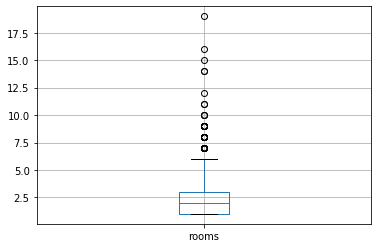

In [91]:
df.boxplot(column='rooms')

Квартиры с количеством комнат выше 6 встречаются очень редко, т.к. они отсечены верхним "усом" ящика и выглядят на диаграмме  как выбросы. Это вполне соответсвует реальности  
Посчитаем количество таких квартир:

In [92]:
df.query('rooms > 7').rooms.count()

30

Действительно, таких значений очень мало и от них можно избавиться.

In [93]:
df.query('rooms <= 7', inplace=True)
df.rooms.describe()

count    23433.000000
mean         2.070883
std          1.022478
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

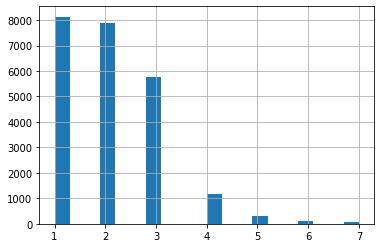

In [94]:
df.rooms.hist(bins=20)

Посмотрим на выбросы в столбце со стоимостью квартиры:

In [95]:
df.last_price.describe()

count    2.343300e+04
mean     6.472650e+06
std      1.040867e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.635000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Как мы отмечали ранее, максимальное значение довольно сильно разнится с медианным. Это кажется необычным

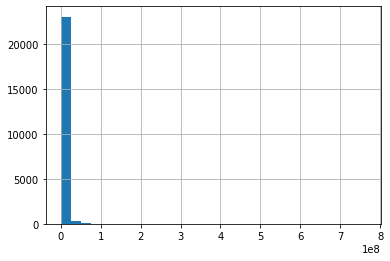

In [96]:
df.last_price.hist(bins=30)

Здесь определенно присутствуют выпадающие из общей картины значения. Попробуем рассмотреть их на диаграмме разброса: 

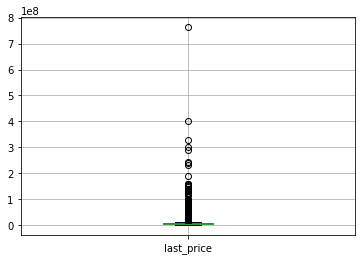

In [97]:
df.boxplot(column='last_price')

Мы видим, что выбросы начинаются уже примерно от стоимости в 10 млн.  
Изменим масштаб (до 50млн), чтобы лучше рассмотреть границы "усов" диаграммы:

(0, 50000000)

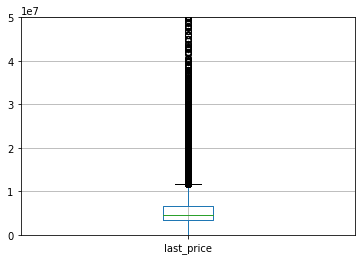

In [98]:
df.boxplot(column='last_price')
plt.ylim(0, 50000000)

Уже более четко можно проследить где начинаются редкие и выбивающиеся из общей картины значения - там где заканчивается верхний ус, а это примерно на 12 млн. Посмотрим сколько значений попадает в более чем 12 млн:

In [99]:
blowouts = df.query('last_price > 12000000').last_price.count()
print(blowouts, 'выпадающих значений от общего количества строк в датасете =', len(df.index))
print('{:.0%}'.format(blowouts/len(df.index)), 'выпадающих значений в столбце "last_price"')

1882 выпадающих значений от общего количества строк в датасете = 23433
8% выпадающих значений в столбце "last_price"


8% это достаточно ощутимо для выборки. Попробуем ограничить на более высоких суммах:

In [100]:
blowouts = df.query('last_price > 20000000').last_price.count()
print(blowouts, 'выпадающих значений от общего количества строк в датасете =', len(df.index))
print('{:.0%}'.format(blowouts/len(df.index)), 'выпадающих значений в столбце "last_price"')

671 выпадающих значений от общего количества строк в датасете = 23433
3% выпадающих значений в столбце "last_price"


У нас получился совсем небольшой процент от общего количества значений в датафрейме. Поэтому можно такие строки убрать и не брать в дальнейший учет.

In [101]:
df.query('last_price < 20000000', inplace=True)
df.last_price.describe()

count    2.274600e+04
mean     5.409993e+06
std      3.188441e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64

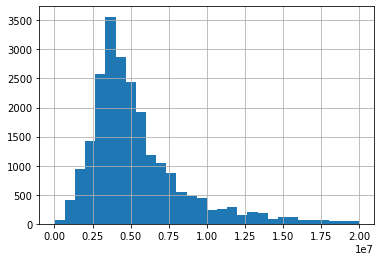

In [102]:
df.last_price.hist(bins=30)

Теперь гистограмма распределения величины цена квартиры выглядит красиво и можно сделать вывод о том, что цена нормально распределена.

####   Исследование факторов, влияющих на стоимость квартиры

Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.  

In [103]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_m2', 'year_exposition',
       'month_exposition', 'day_exposition', 'floor_class', 'living_to_total',
       'kitchen_to_total', 'plan_flat', 'flat_class'],
      dtype='object')

In [104]:
def floor_number(row):
    if row['floor_class'] == 'первый':
        return 1
    if row['floor_class'] == 'последний':
        return 3
    return 2

df['floor_num'] = df.apply(floor_number, axis=1)
df['floor_num'].value_counts()

2    16722
3     3185
1     2839
Name: floor_num, dtype: int64

Посторим матрицу диаграмм рассеяния по указанным столбцам для просмотра корреляции всех величин с ценой квартиры:

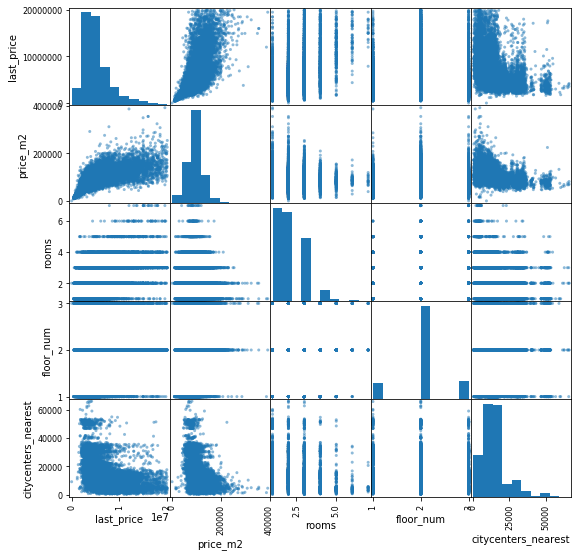

In [105]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df[['last_price', 'price_m2', 'rooms', 'floor_num', 'citycenters_nearest']], figsize=(9, 9))
plt.show() 

Выведем матрицу корреляции по тем же столбцам:

In [106]:
df[['last_price', 'price_m2', 'rooms', 'floor_num', 'citycenters_nearest']].corr()

,last_price,price_m2,rooms,floor_num,citycenters_nearest
last_price,1.000000,0.632220,0.509670,0.052474,-0.356247
price_m2,0.632220,1.000000,-0.128237,0.041750,-0.390968
rooms,0.509670,-0.128237,1.000000,0.007191,-0.142847
floor_num,0.052474,0.041750,0.007191,1.000000,-0.020117
citycenters_nearest,-0.356247,-0.390968,-0.142847,-0.020117,1.000000


**По матрицам можно сделать следующие выводы:**
1. Между стоимостью квартиры и ценой за квадратный метр тесная взаимосвязь, т.к. коэффициент корреляции близок к единице. По диаграмме рассеяния видим, что с увеличением цены квадратного метра, увеличивается и общая стоимость квартиры, что логично.


2. Между стоимостью квартиры и количеством комнат хорошая прямая связь (примерно 0.5). Это означает что с ростом цен, увеличивается и число комнат в квартире. Мы можем подтвердить это утверждения посмотрев на диаграмму: видим что основная доля 2-4 комнатных квартир продается в диапазоне цен от 1млн до четырех, т.к. там наиболее плотное скопление точек. Квартиры с большим количеством комнат продаются по более высокой цене и их значительно меньше, об этом свидетельствует более редкое заполнение точками на диаграмме в этой области.


3. Между стоимостью квартиры и этажом квартиры отстуствует взаимосвязь, т.к. коэффициент корреляции сильно близок к нулю. Диаграмма рассеяния это утверждение подстверждает. По ней мы также можем увидеть что среди более дешевых квартир стоимость по этажам равномерно распределена, а среди очень дорогих квартиры покупают в основном на этажах, не относящихся к первому и последнему (другие)


4. Между стоимостью квартиры и отдаленностью от центра существует обратная зависимость, т.е. при увеличении расстояния от центра, уменьшается цена квартиры. Это можно проследить и по диаграмме и по отрицательному значению коэффициента корреляции.

####   Анализ 10 населенных пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений.  

In [107]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class,living_to_total,kitchen_to_total,plan_flat,flat_class,floor_num
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481,Закрытая планировка,premium,2
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277,Закрытая планировка,comfort,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214,Закрытая планировка,business-class,2
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000,Закрытая планировка,premium,2
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,2018,9,0,другой,0.473684,0.299342,Закрытая планировка,econom,2


In [108]:
localities = df.groupby('locality_name').locality_name.count().sort_values(ascending=False).head(10)
localities

locality_name
Санкт-Петербург      14869
посёлок Мурино         512
посёлок Шушары         439
Всеволожск             388
Пушкин                 359
Колпино                335
посёлок Парголово      326
Гатчина                303
деревня Кудрово        295
Выборг                 231
Name: locality_name, dtype: int64

Посчитаем среднюю цену квадратного метра в этих населённых пунктах:

In [109]:
#price_m2
df.query('locality_name in @localities.index').groupby('locality_name').price_m2.mean().sort_values(ascending=False)

locality_name
Санкт-Петербург      108498.593606
Пушкин               101840.799638
деревня Кудрово       92447.355438
посёлок Парголово     90135.075586
посёлок Мурино        85530.255167
посёлок Шушары        78673.295765
Колпино               75241.066982
Гатчина               68625.141404
Всеволожск            67158.922892
Выборг                58095.635151
Name: price_m2, dtype: float64

Выделим населённые пункты из столбца 'locality_name' с самой высокой и самой низкой стоимостью жилья 

In [110]:
localities_all = df.groupby('locality_name').last_price.mean().sort_values(ascending=False)
print('Населенные пункты с самой высокой стоимостью:\n\n',
      localities_all.sort_values(ascending=False).head(3))
print()
print('Населенные пункты с самой низкой стоимостью:\n\n',
      localities_all.sort_values().head(3))

Населенные пункты с самой высокой стоимостью:

 locality_name
деревня Хязельки           1.100000e+07
посёлок Александровская    8.725000e+06
посёлок Репино             6.889139e+06
Name: last_price, dtype: float64

Населенные пункты с самой низкой стоимостью:

 locality_name
деревня Вахнова Кара    450000.0
деревня Старополье      460000.0
деревня Чудской Бор     500000.0
Name: last_price, dtype: float64


####   Анализ изменения цены по степени удалённости от центра

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра.  
 Выделим квартиры в Санкт-Петербурге (по названию населенного пункта из столбца'locality_name').

In [111]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class,living_to_total,kitchen_to_total,plan_flat,flat_class,floor_num
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481,Закрытая планировка,premium,2
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214,Закрытая планировка,business-class,2
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000,Закрытая планировка,premium,2
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.884082,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,2019,4,3,другой,0.571007,0.263966,Закрытая планировка,business-class,2
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,2017,2,6,другой,0.714754,0.106557,Закрытая планировка,business-class,2


Создадим столбец с округленной до целых удаленностью от центра в км при помощи преобразования значений столбца citycenters_nearest:  

In [112]:
spb['citycenter_km'] = round(spb.citycenters_nearest / 1000)
spb['citycenter_km']
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class,living_to_total,kitchen_to_total,plan_flat,flat_class,floor_num,citycenter_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481,Закрытая планировка,premium,2,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214,Закрытая планировка,business-class,2,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000,Закрытая планировка,premium,2,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.884082,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,2019,4,3,другой,0.571007,0.263966,Закрытая планировка,business-class,2,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,2017,2,6,другой,0.714754,0.106557,Закрытая планировка,business-class,2,15.0


Далее посчитаем среднюю цену для каждого километра:

In [113]:
mean_price_spb = pd.DataFrame(spb.pivot_table(index='citycenter_km', values='price_m2'))
mean_price_spb.index = pd.to_numeric(mean_price_spb.index, downcast='integer')
mean_price_spb

,price_m2
citycenter_km,
0,118153.215310
1,129271.706222
2,121496.770997
3,112672.634494
4,120625.562426
5,125408.706626
6,126641.824610
7,123858.700050
8,120538.874575


Построим график зависимости цены квадратного метра от удаленности от центра в км:  
он должен показать, как цена зависит от удалённости от центра:

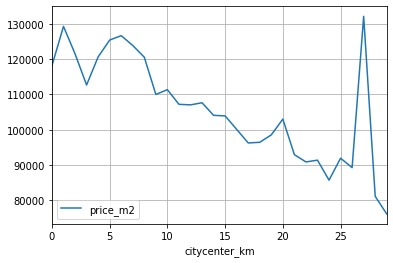

In [114]:
mean_price_spb.reset_index().plot(x='citycenter_km', y='price_m2', grid=True)

По графику можно увидеть скачок от высокой цены к низкой. Предположим что центральный район Санкт-Петербурга заказнчивается на том моменте, где скачок идет на спад. Таким образом центр ограничен радиусом примерно в 9 км.  
Также можно увидеть что на 26-27 км от центра находится какой-то элитный район, судя по сильному скачку цены вверх в этом месте графика.

####   Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре, ограничив по значению удаленность от центра в км на семи километрах.  

In [115]:
center_spb = spb.query('citycenter_km <= 9')
center_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,year_exposition,month_exposition,day_exposition,floor_class,living_to_total,kitchen_to_total,plan_flat,flat_class,floor_num,citycenter_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000,Закрытая планировка,premium,2,8.0
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,66872.427984,2015,10,5,первый,0.478395,0.201646,Закрытая планировка,business-class,1,2.0
35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,False,False,False,17.0,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,104026.845638,2017,6,0,другой,0.697987,0.114094,Закрытая планировка,premium,2,4.0
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.0,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,86727.941176,2017,9,4,последний,0.691176,0.080882,Закрытая планировка,premium,3,7.0
61,18,7990000.0,74.0,2017-08-24,2,2.65,4,43.0,4,False,False,False,20.0,0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609.0,107972.972973,2017,8,3,последний,0.581081,0.270270,Закрытая планировка,business-class,3,4.0


Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.  

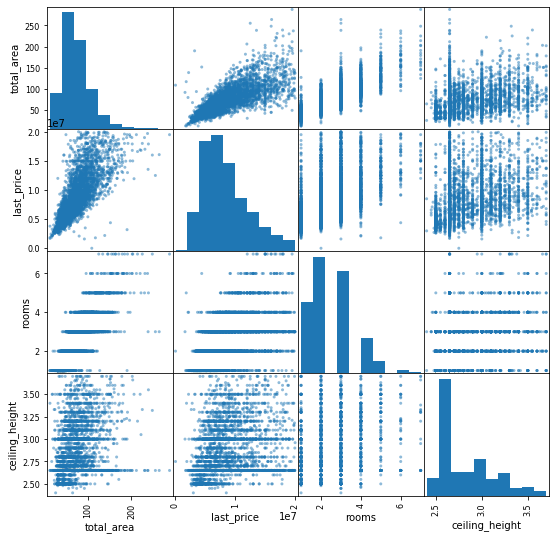

In [116]:
scatter_matrix(center_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize=(9, 9))
plt.show() 

Выведем матрицу корреляции по тем же столбцам:

In [117]:
center_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.755797,0.814778,0.286432
last_price,0.755797,1.000000,0.531640,0.249777
rooms,0.814778,0.531640,1.000000,0.256421
ceiling_height,0.286432,0.249777,0.256421,1.000000


По диаграммам и матрице коэффициентов корреляции можно сделать следующие выводы:

1. Присутствует сильная прямая зависимость между значениями цены квартиры и столбцами с площадью и количеством комнат, т.к. коэффициенты корреляции близки к единице и по диаграмме можно четко проследить увеличение одной величины с увеличением другой.
2. Цена не сильно зависит от высоты потолка в квартире (коэфф корреляции ближе к нулю, чем к единице, а на диаграмме нельзя проследить взаимосвязь)

+Можно отметить что количество комнат в центральных квартирах больше

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

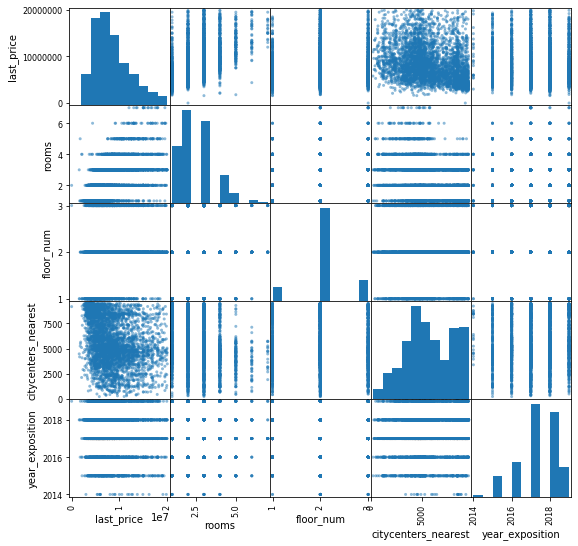

In [118]:
scatter_matrix(center_spb[['last_price', 'rooms', 'floor_num', 'citycenters_nearest', 'year_exposition']], figsize=(9, 9))
plt.show() 

Выведем матрицу корреляции по тем же столбцам:

In [119]:
center_spb[['last_price', 'rooms', 'floor_num', 'citycenters_nearest', 'year_exposition']].corr()

,last_price,rooms,floor_num,citycenters_nearest,year_exposition
last_price,1.000000,0.531640,0.103359,-0.270431,-0.034665
rooms,0.531640,1.000000,0.085462,-0.276017,-0.064486
floor_num,0.103359,0.085462,1.000000,-0.025088,0.003165
citycenters_nearest,-0.270431,-0.276017,-0.025088,1.000000,0.085367
year_exposition,-0.034665,-0.064486,0.003165,0.085367,1.000000


По диаграммам и матрице коэффициентов корреляции можно сделать следующие выводы:

1. Между ценой квартиры и количеством комнат присутствует ощутимая взаимосвязь, которую можно проследить также и по диаграмме.
2. Такие показатели как этаж, отдаленность от центра и год размещения объявления не имеют четкой взаимосвязи с ценой на квартиру или совсем незначительно влияют на нее, т.к. показатели коэффициентов корреляции близки к нулю.  

Это отличается от выводов по всему городу, где показатели представляли ценность в ценообразовании квартир.  
И такое положение дел можно объяснить тем, что удаленность от центра в пределах самого центра уже не такая яркая, чтобы вызывать скачки цены. Также не имеет значения на каком этаже находится квартира, т.к. с точки зрения логики, в центре любого крупного города все квартиры практически одинаково дороги, т.к. на них имеется спрос.

### Шаг 5. Общий вывод

Мы проделали большую проектную работу, содержащую множество шагов, каждый из которых оказался важен для формулирования четких и правильных выводов.

На этапе предобработки данных, мы провели исследование информации об объектах недвижимости Санкт-Петербурга и Ленинградской области, удалили или заменили пропущенные значения для более четкого дальнейшего анализа данных. Добавили множетсво вспомогательных столбцов с расчетами и категориями, которыми мы пользовались много раз в дальнейшем на этапе анализа данных.

Мы избавились от выбросов в данных столбцов с нереальной площадью и аномально высоким количеством комнат в квартирах, которые спорили с реальностью и могли негативно повлиять на дальнейший анализ.

Анализ данных был объемным и включал множество шагов, в результате которых можно сформулировать вывод о том, что конкретно влияет на цену квартиры:

С помощью графиков, диаграмм и их анализа мы выяснили, что **цены квартир находятся в прямой зависимости от количества комнат, общей площади и отдаленности от центра города, с отдаленностью от центра - в обратной зависимости**. В то же время, если ограничиться только объектами находящимися в пределах центра города, взаимосвязь появляется между количеством комнат и ценой, а также пропадает у цены и отдаленности от центра, ведь рассматриваемые нами квартиры итак располагаются там. 